<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Validation and cross-validation

In this exercise you will implement a validation pipeline.

At the end of the MSLE exercise you tested your model against the training and test datasets. As you should observe, there's a gap between the results. By validating your model, not only should you be able to anticipate the test time performance, but also have a method to compare different models.

Implement the basic validation method, i.e. a random split. Test it with your model from Exercise MSLE.

In [1]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2024-10-28 18:18:57--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1 [following]
--2024-10-28 18:18:57--  https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba3a9f616e2cf1eda196b7c341.dl.dropboxusercontent.com/cd/0/inline/CdUNkbl-0ho3Wx3vQIzrkZRwa61dJ9sUd0FI8GpYUGTRKAuiUyzLeGOy80JszSWOeZV1kLeQrmE2_YbEjj-b_PWoezH9t-lfQLT0EcCSd_MoEwIyUE9U7a4i-a7HFV2Ffpw/file?dl=1# [following]
--2024-10-28 18:18:58--  https://ucba3a9f616e2cf1eda196b7c341.dl.dropboxusercontent.com/cd/0/inl

In [2]:
from typing import Tuple

import numpy as np
import pandas as pd
from sklearn import preprocessing

np.random.seed(357)

In [3]:
def load(name: str) -> Tuple[np.ndarray, np.array]:
    data = pd.read_csv(name)
    x = data.loc[:, data.columns != 'cena'].to_numpy()
    y = data['cena'].to_numpy()

    return x, y

In [4]:
x_train, y_train = load('mieszkania.csv')
x_test, y_test = load('mieszkania_test.csv')

In [5]:
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(x_train[:, 1])
x_train[:, 1] = labelencoder.transform(x_train[:, 1])
x_test[:, 1] = labelencoder.transform(x_test[:, 1])

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [81]:
def gradient_descent_linear_regression(X, y, learning_rate=1e-7, n_iterations=100000):

    bias = np.mean(y_train)
    weight = np.random.normal(0, 1, size=X.shape[1])
    m = len(y)
    for iteration in range(n_iterations):
        y_pred = X @ weight + bias
        d_bias = 2 * (1 / m) * np.sum(y_pred - y)
        d_weight = 2 * (1 / m) * X.T @ (y_pred - y)
        bias -= learning_rate * d_bias
        weight -= learning_rate * d_weight

    return weight, bias

In [82]:
def mean_least_squares_error(y_true, y_pred):
    m = len(y_true)
    mlse = (1 / m) * np.sum((y_true - y_pred) ** 2)
    return mlse


In [83]:
#######################################################
# TODO: Implement the basic validation method,        #
# compare MSLE on training, validation, and test sets #
def basic_validation(x_train, y_train, x_test, y_test, prt=True):

  weight, bias = gradient_descent_linear_regression(x_train, y_train)

  y_pred_train = x_train @ weight + bias
  y_pred_test = x_test @ weight + bias

  if prt:
    print(f"MLSE for train set: {mean_least_squares_error(y_pred_train, y_train)}")
    print(f"MLSE for test set: {mean_least_squares_error(y_pred_train, y_train)}")

  return mean_least_squares_error(y_pred_train, y_train), mean_least_squares_error(y_pred_train, y_train)

basic_validation(x_train, y_train, x_test, y_test)
#######################################################


MLSE for train set: 15149047658.235533
MLSE for test set: 15149047658.235533


(15149047658.235533, 15149047658.235533)

To make the random split validation reliable, a huge chunk of training data may be needed. To get over this problem, one may apply cross-validaiton.

![alt-text](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

Let's now implement the method. Make sure that:
* number of partitions is a parameter,
* the method is not limited to `mieszkania.csv`,
* the method is not limited to one specific model.

In [57]:
####################################
# TODO: Implement cross-validation #
####################################

def cross_validation(x_train, y_train, x_test, y_test, folds=5):

  x = np.concatenate((x_train, x_test))
  y = np.concatenate((y_train, y_test))
  n = len(y)
  rg = np.linspace(0, n-1, n, dtype=np.int16)
  np.random.shuffle(rg)
  m = len(rg) / folds

  tr = []
  te = []
  for i in range(folds):
    idcs = rg[int(i*m):int(m*(i+1))]
    x_te = x[idcs]
    y_te = y[idcs]
    x_tr = x[~idcs]
    y_tr = y[~idcs]
    mlse_tr, mlse_te = basic_validation(x_tr, y_tr, x_te, y_te, prt=False)
    tr.append(mlse_tr)
    te.append(mlse_te)

  mean_tr = sum(tr) / folds
  mean_te = sum(te) / folds

  print(f"Mean train error: {mean_tr}")
  print(f"Mean test error: {mean_te}")
  return mean_tr, mean_te

mean_tr, mean_te = cross_validation(x_train, y_train, x_test, y_test)

Mean train error: 16520605620.231243
Mean test error: 16520605620.231243


Recall that sometimes validation may be tricky, e.g. significant class imbalance, having a small number of subjects, geographically clustered instances...

What could in theory go wrong here with random, unstratified partitions? Think about potential solutions and investigate the data in order to check whether these problems arise here.

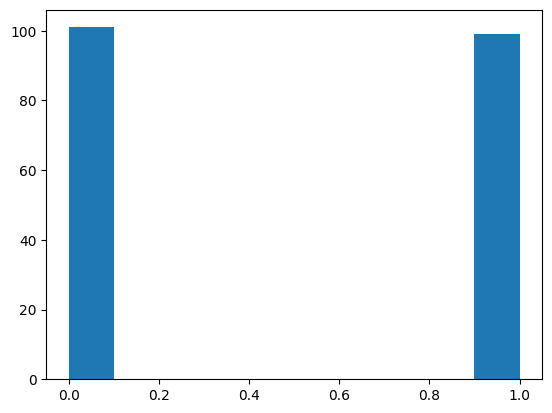

In [94]:
##############################
# TODO: Investigate the data #
##############################

#Potential way for data investigation could be plotting distributions of data. We can use histograms for that matter

import matplotlib.pyplot as plt

dist1 = plt.hist(x_train[:,5])

#strong class inbalace appears only in the 3rd feature (counting from zeroth)